<a href="https://colab.research.google.com/github/00alba00/TFM/blob/main/Lowest_Frequency_Word_and_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PROCESSING**

Processing CREA_total

In [ ]:
import pandas as pd

# Read the file line by line
with open('CREA_total.TXT', encoding='latin1') as file:
    lines = file.readlines()

# Remove the newline characters and strip spaces
lines = [line.strip() for line in lines]

# Skip the header line if it exists
if lines[0].startswith('Orden'):
    lines = lines[1:]

# Convert to DataFrame
crea_total = pd.DataFrame(lines, columns=['orden_frec_absoluta_frec_normalizada'])

# Remove spaces within the column data
crea_total['orden_frec_absoluta_frec_normalizada'] = crea_total['orden_frec_absoluta_frec_normalizada'].str.replace(" ", "")

# Split the column into separate columns using tab as delimiter
crea_total[['ranking', 'palabra', 'frecuencia_absoluta', 'frecuencia_normalizada']] = crea_total['orden_frec_absoluta_frec_normalizada'].str.split('\t', expand=True)

# Drop any rows where the split was unsuccessful (e.g., header row)
crea_total = crea_total.dropna()

# Debugging: Check the DataFrame after splitting
print(crea_total.head())

# Convert 'ranking' to numeric type
crea_total['ranking'] = pd.to_numeric(crea_total['ranking'], errors='coerce')

# Remove commas from 'frecuencia_absoluta' and convert to numeric type
crea_total['frecuencia_absoluta'] = crea_total['frecuencia_absoluta'].str.replace(",", "").astype(float)

# Remove any unwanted characters from 'frecuencia_normalizada' and convert to numeric type
crea_total['frecuencia_normalizada'] = crea_total['frecuencia_normalizada'].str.replace("\u001a", "").astype(float)

# Debugging: Check the final DataFrame
print(crea_total.head())

# Save to CSV
crea_total.to_csv("CREA_total.csv", index=False)

  orden_frec_absoluta_frec_normalizada ranking palabra frecuencia_absoluta  \
0          1.\tde\t9,999,518\t65545.55      1.      de           9,999,518   
1          2.\tla\t6,277,560\t41148.59      2.      la           6,277,560   
2         3.\tque\t4,681,839\t30688.85      3.     que           4,681,839   
3          4.\tel\t4,569,652\t29953.48      4.      el           4,569,652   
4          5.\ten\t4,234,281\t27755.16      5.      en           4,234,281   

  frecuencia_normalizada  
0               65545.55  
1               41148.59  
2               30688.85  
3               29953.48  
4               27755.16  
  orden_frec_absoluta_frec_normalizada  ranking palabra  frecuencia_absoluta  \
0          1.\tde\t9,999,518\t65545.55      1.0      de            9999518.0   
1          2.\tla\t6,277,560\t41148.59      2.0      la            6277560.0   
2         3.\tque\t4,681,839\t30688.85      3.0     que            4681839.0   
3          4.\tel\t4,569,652\t29953.48      4.0  

In [ ]:
crea_total= pd.read_csv("CREA_total.csv")

crea_total = crea_total.drop(columns=['orden_frec_absoluta_frec_normalizada', "ranking"])

Calculating the lowest frequency word

In [ ]:
import pandas as pd
import re

def tokenize_text(text):
    # Use regular expression to split text into tokens based on whitespace and punctuation
    tokens = re.findall(r'\w+|[^\w\s]', text, re.UNICODE)
    # Convert tokens to lowercase
    tokens = [token.lower().strip() for token in tokens if token.isalnum()]
    return tokens

def tokenize_escola_file(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Tokenize each sentence in the "Sentence" column
    df['Tokenized Sentence'] = df['Sentence'].apply(tokenize_text)

    # Return the DataFrame with the tokenized sentences
    return df[['ID', 'Tokenized Sentence']]


filename = 'test_pred.csv'
tokenized_data = tokenize_escola_file(filename)
print(tokenized_data.head())

             ID                                 Tokenized Sentence
0  ESCoLA_10146                                  [qué, te, parece]
1   ESCoLA_2419    [juan, es, el, chico, más, libros, que, compró]
2   ESCoLA_4535  [escribió, la, carta, juan, o, la, tarjeta, pe...
3   ESCoLA_7107  [los, mecánicos, arreglaron, la, puerta, y, la...
4   ESCoLA_3032  [maría, quería, un, coche, y, se, le, hemos, r...


In [ ]:
import pandas as pd

def calculate_norm_frequencies(tokenized_data_path, try_csv_path):

    crea_total['palabra'] = crea_total['palabra'].str.strip().str.lower()

    # Create a dictionary mapping words to relative frequencies
    word_to_rel_freq = dict(zip(crea_total['palabra'], crea_total['frecuencia_normalizada']))

    # Function to calculate normalized frequencies for a given tokenized sentence
    def calculate_norm_freq(sentence):
        return [word_to_rel_freq.get(token, 0.0) for token in sentence]

    # Apply the function to each tokenized sentence and create a new column with the results
    tokenized_data['Normalized Frequencies'] = tokenized_data['Tokenized Sentence'].apply(calculate_norm_freq)

    return tokenized_data


result = calculate_norm_frequencies("tokenized_data", "crea_total")
print(result)

                ID                                 Tokenized Sentence  \
0     ESCoLA_10146                                  [qué, te, parece]   
1      ESCoLA_2419    [juan, es, el, chico, más, libros, que, compró]   
2      ESCoLA_4535  [escribió, la, carta, juan, o, la, tarjeta, pe...   
3      ESCoLA_7107  [los, mecánicos, arreglaron, la, puerta, y, la...   
4      ESCoLA_3032  [maría, quería, un, coche, y, se, le, hemos, r...   
...            ...                                                ...   
1055  ESCoLA_10334         [fue, con, aquel, lápiz, con, que, dibujó]   
1056   ESCoLA_3673  [un, futbolista, agredió, a, una, periodista, ...   
1057   ESCoLA_4060  [durante, los, primeros, años, se, encargó, de...   
1058   ESCoLA_1919                        [juan, es, un, poco, torpe]   
1059    ESCoLA_512            [hay, un, cartel, fijo, por, el, bedel]   

                                 Normalized Frequencies  
0                             [1212.36, 786.92, 357.59]  
1     [

In [ ]:
import pandas as pd

def find_lowest_freq(row):
    frequencies = row['Normalized Frequencies']
    lowest_freq = float('inf')  # Initialize with positive infinity
    for freq in frequencies:
        if freq >= 0 and freq < lowest_freq:
            lowest_freq = freq
    return lowest_freq if lowest_freq != float('inf') else 0.0

def add_lowest_freq_column(df):
    df['Lowest_Freq_Word'] = df.apply(find_lowest_freq, axis=1)
    return df



new_result = add_lowest_freq_column(result)
print(result)

                ID                                 Tokenized Sentence  \
0     ESCoLA_10146                                  [qué, te, parece]   
1      ESCoLA_2419    [juan, es, el, chico, más, libros, que, compró]   
2      ESCoLA_4535  [escribió, la, carta, juan, o, la, tarjeta, pe...   
3      ESCoLA_7107  [los, mecánicos, arreglaron, la, puerta, y, la...   
4      ESCoLA_3032  [maría, quería, un, coche, y, se, le, hemos, r...   
...            ...                                                ...   
1055  ESCoLA_10334         [fue, con, aquel, lápiz, con, que, dibujó]   
1056   ESCoLA_3673  [un, futbolista, agredió, a, una, periodista, ...   
1057   ESCoLA_4060  [durante, los, primeros, años, se, encargó, de...   
1058   ESCoLA_1919                        [juan, es, un, poco, torpe]   
1059    ESCoLA_512            [hay, un, cartel, fijo, por, el, bedel]   

                                 Normalized Frequencies  Lowest_Freq_Word  
0                             [1212.36, 786.92,

Calculating Accuracy

In [ ]:
import pandas as pd

def calculate_accuracy(df):
    # Calculate accuracy for each row
    accuracy = (df['xlm-roberta-large'] == df['Label']).astype(int)

    # Add accuracy values to a new column
    df['Accuracy'] = accuracy

    # Return the DataFrame with Model, Label, and Accuracy columns
    return df[["ID", 'xlm-roberta-large', 'Label', 'Accuracy']]

# Read the CSV file
df = pd.read_csv('test_pred.csv')

# Call the function to calculate accuracy
result_df = calculate_accuracy(df)


print(result_df)

                ID  xlm-roberta-large  Label  Accuracy
0     ESCoLA_10146                  1      0         0
1      ESCoLA_2419                  1      1         1
2      ESCoLA_4535                  0      1         0
3      ESCoLA_7107                  0      0         1
4      ESCoLA_3032                  0      0         1
...            ...                ...    ...       ...
1055  ESCoLA_10334                  1      1         1
1056   ESCoLA_3673                  0      0         1
1057   ESCoLA_4060                  0      0         1
1058   ESCoLA_1919                  0      0         1
1059    ESCoLA_512                  1      1         1

[1060 rows x 4 columns]


Merging dataframes

In [ ]:
import pandas as pd

# Assuming you have your dataframes result and result_df already defined

# Merge the two dataframes on the 'ID' column
merged_df = pd.merge(result, result_df, on='ID', how='inner')

# Selecting the desired columns
new_df = merged_df[['ID', 'Lowest_Freq_Word', 'Accuracy']]


print(new_df)

                ID  Lowest_Freq_Word  Accuracy
0     ESCoLA_10146            357.59         0
1      ESCoLA_2419             13.24         1
2      ESCoLA_4535             29.68         0
3      ESCoLA_7107              0.68         1
4      ESCoLA_3032              5.90         1
...            ...               ...       ...
1055  ESCoLA_10334              2.42         1
1056   ESCoLA_3673              0.92         1
1057   ESCoLA_4060              7.68         1
1058   ESCoLA_1919              8.35         1
1059    ESCoLA_512              0.74         1

[1060 rows x 3 columns]


# **EDA**

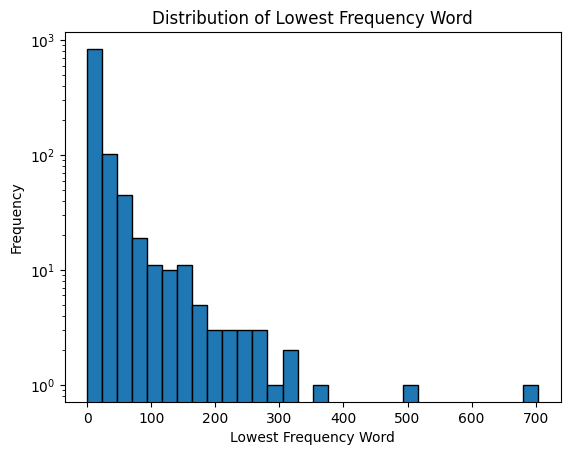

Median of Lowest Frequency Word: 6.95
IQR of Lowest Frequency Word: 17.7875
Accuracy Counts:
 Accuracy
1    706
0    354
Name: count, dtype: int64
Accuracy Percentages:
 Accuracy
1    66.603774
0    33.396226
Name: proportion, dtype: float64
Lowest Frequency Word by Accuracy Status:
                Median          IQR
Accuracy                          
0         7350.354659  6005.872655
1         7471.424722  6709.478000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 2: Descriptive Statistics
# Lowest Frequency Word(Continuous Variable)
plt.hist(new_df['Lowest_Freq_Word'], bins=30, edgecolor='k')
plt.xlabel('Lowest Frequency Word')
plt.ylabel('Frequency')
plt.yscale('log') #Added the log function to see better the distribution
plt.title('Distribution of Lowest Frequency Word')
plt.show()

Lowest_Freq_Word_median = new_df['Lowest_Freq_Word'].median()
Lowest_Freq_Word_iqr = new_df['Lowest_Freq_Word'].quantile(0.75) - new_df['Lowest_Freq_Word'].quantile(0.25)
print(f"Median of Lowest Frequency Word: {Lowest_Freq_Word_median}")
print(f"IQR of Lowest Frequency Word: {Lowest_Freq_Word_iqr}")

# Accuracy (Categorical Variable)
accuracy_counts = new_df['Accuracy'].value_counts()
accuracy_percentages = new_df['Accuracy'].value_counts(normalize=True) * 100
print("Accuracy Counts:\n", accuracy_counts)
print("Accuracy Percentages:\n", accuracy_percentages)

# Step 3: Descriptive Statistics by Outcome Group
grouped = new_df.groupby('Accuracy')

# Average Normalized Frequency by Accuracy Status
Lowest_Freq_Word_by_accuracy = grouped['Lowest_Freq_Word'].agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])
Lowest_Freq_Word_by_accuracy.columns = ['Median', 'IQR']
print("Lowest Frequency Word by Accuracy Status:\n", avg_norm_freq_by_accuracy)


# **ASSUMPTIONS CHECK**

Step 1: Independence of Observations Ensure your data collection process guarantees independence. This step is not typically performed in code but through design and documentation.

Step 2: Multicollinearity Check

Step 3: Linearity of Continuous Predictors

Optimization terminated successfully.
         Current function value: 0.636403
         Iterations 4
VIF Values:
            feature      VIF
0             const  1.20317
1  Lowest_Freq_Word  1.00000


<ipython-input-20-f73a2522b9bf>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'log_odds'] = model.predict(X)


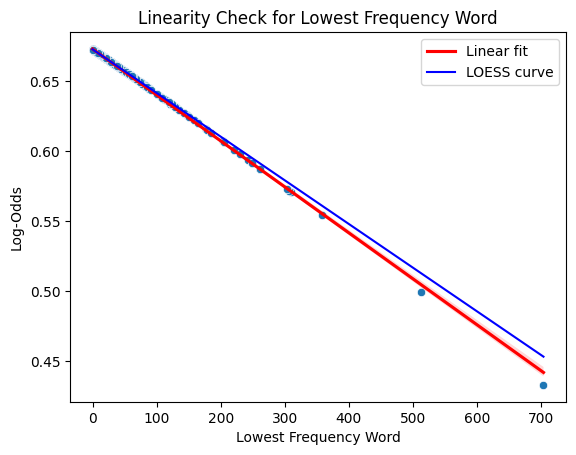

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np

# Checking multicollinearity
# Adding a constant to the independent variable
X = new_df[['Lowest_Freq_Word']]
X = sm.add_constant(X)

# Fitting the model
model = sm.Logit(new_df['Accuracy'], X).fit()

# Calculating VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF Values:")
print(vif_data)

# Check linearity assumption
# Adding a column for log-odds
new_df.loc[:, 'log_odds'] = model.predict(X)

# Plotting with LOESS and Linear regression lines
sns.scatterplot(x='Lowest_Freq_Word', y='log_odds', data=new_df)

# Adding a linear fit
sns.regplot(x='Lowest_Freq_Word', y='log_odds', data=new_df, scatter=False, color='red', label='Linear fit')

# Adding a loess curve
loess = sm.nonparametric.lowess
loess_result = loess(new_df['log_odds'], new_df['Lowest_Freq_Word'], frac=0.3)
plt.plot(loess_result[:, 0], loess_result[:, 1], color='blue', label='LOESS curve')

plt.title('Linearity Check for Lowest Frequency Word')
plt.xlabel('Lowest Frequency Word')
plt.ylabel('Log-Odds')
plt.legend()
plt.show()


# **Logistic Regression Model**

Applying a Logistic Regression Model

In [ ]:
import statsmodels.api as sm

def logistic_regression(df):
    # Add constant term for intercept
    df['intercept'] = 1

    # Define independent and dependent variables
    X = df[['Lowest_Freq_Word', 'intercept']]
    y = df['Accuracy']

    # Fit logistic regression model
    logit_model = sm.Logit(y, X)
    result = logit_model.fit()

    return result


result = logistic_regression(new_df)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.636403
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Accuracy   No. Observations:                 1060
Model:                          Logit   Df Residuals:                     1058
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:               0.0008571
Time:                        10:55:38   Log-Likelihood:                -674.59
converged:                       True   LL-Null:                       -675.17
Covariance Type:            nonrobust   LLR p-value:                    0.2820
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Lowest_Freq_Word    -0.0014      0.001     -1.083      0.279      -0.004       0.001
intercept  

<ipython-input-21-d3b96f157b5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intercept'] = 1
